In [1]:
!pip install kneed
!pip install xgboost
!pip install lightgbm
!pip install ngboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import math

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import uniform_filter1d
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.ndimage import uniform_filter1d
import matplotlib.patches as mpatches
from collections import defaultdict
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score



from catboost import CatBoostRegressor
from kneed import KneeLocator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score



from catboost import CatBoostRegressor
from kneed import KneeLocator

In [11]:
df = pd.read_csv('/Users/joao altarugio/Desktop/Projeto LaMav/data/Really important data/RefractiveIndex_clean.csv')
df

,H,Li,Be,B,C,N,O,F,Na,Mg,...,Re,Pt,Au,Hg,Tl,Pb,Bi,Th,U,RefractiveIndex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.630000,0.0,0.073333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657
1,0.0,0.0,0.0,0.0,0.0,0.0,0.624881,0.0,0.070428,0.019714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.651
2,0.0,0.0,0.0,0.0,0.0,0.0,0.620012,0.0,0.067698,0.038418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.648
3,0.0,0.0,0.0,0.0,0.0,0.0,0.615143,0.0,0.064971,0.057114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.644
4,0.0,0.0,0.0,0.0,0.0,0.0,0.622678,0.0,0.069171,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47949,0.0,0.0,0.0,0.0,0.0,0.0,0.614246,0.0,0.068289,0.009847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.503
47950,0.0,0.0,0.0,0.0,0.0,0.0,0.610767,0.0,0.080119,0.006285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500
47951,0.0,0.0,0.0,0.0,0.0,0.0,0.613590,0.0,0.078927,0.006285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.495
47952,0.0,0.0,0.0,0.0,0.0,0.0,0.610737,0.0,0.080132,0.006350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500


In [12]:
df = df.loc[:, (df != 0).any(axis=0)]

In [13]:
df.shape

(47954, 64)

In [14]:
df = df.loc[:, (df != 0).any(axis=0)]

In [15]:
df.shape

(47954, 64)

# Implementação cv_01

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define as features e o alvo
X = df.drop(columns=['RefractiveIndex'])
y = df['RefractiveIndex']

# Inicializa o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define os modelos
modelos = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'RandomForest': RandomForestRegressor(n_estimators=390, max_features='sqrt', random_state=42),
    'DecisionTree': DecisionTreeRegressor(criterion='friedman_mse', min_impurity_decrease=0.0012, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=390, max_features='sqrt', random_state=42)
}

# DataFrame para armazenar resultados
resultados = pd.DataFrame(index=X.index)
resultados['RefractiveIndex_real'] = y

# Inicializa colunas de previsão
for nome in modelos.keys():
    resultados[nome + '_pred'] = np.nan

# Validação cruzada
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train = y.iloc[train_idx]

    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X.iloc[val_idx])
        resultados.loc[X.iloc[val_idx].index, nome + '_pred'] = y_pred

# Exibe as primeiras linhas do DataFrame com previsões
print(resultados.head())


In [ ]:
resultados

,RefractiveIndex_real,KNN_pred,RandomForest_pred,DecisionTree_pred,SVR_pred,ExtraTrees_pred
0,1.657,1.6538,1.654401,1.656974,1.652139,1.654500
1,1.651,1.6558,1.653282,1.648667,1.651843,1.659433
2,1.648,1.6560,1.658515,1.649667,1.653159,1.655062
3,1.644,1.6574,1.665067,1.698500,1.651125,1.653687
4,1.676,1.6644,1.677136,1.686800,1.665813,1.675546
...,...,...,...,...,...,...
47949,1.503,1.4990,1.501991,1.518496,1.524007,1.502242
47950,1.500,1.4972,1.501636,1.492980,1.517427,1.500959
47951,1.495,1.5004,1.502593,1.508214,1.518274,1.502759
47952,1.500,1.4972,1.502513,1.508722,1.517792,1.501992


#Caminho onde você quer salvar — altere se quiser salvar em outro local
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_edgar.pkl"

#Salvando o dicionário em arquivo
with open(caminho_arquivo, "wb") as f:
    pickle.dump(resultados, f)

print(f"Arquivo salvo com sucesso em: {caminho_arquivo}")

In [16]:
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_edgar.pkl"
with open(caminho_arquivo, "rb") as f:
   resultados = pickle.load(f)

In [17]:
resultados = resultados.drop(columns='SVR_pred')

# Identificando cotovelo maiores erros

In [18]:
def encontrar_maiores_erros_media(df_metrics):
    # Calcula a média das previsões dos modelos
    previsoes_modelos = df_metrics[[
        "KNN_pred",
        "RandomForest_pred",
        "DecisionTree_pred",
        "ExtraTrees_pred"
    ]]
    media_previsoes = previsoes_modelos.mean(axis=1)

    # Calcula o erro absoluto entre o valor real e a média das previsões
    erro_absoluto_medio = abs(df_metrics["RefractiveIndex_real"] - media_previsoes)

    # Cria DataFrame com erro e índice original
    df_erros_ordenado = pd.DataFrame({
        "Erro_Absoluto_Medio": erro_absoluto_medio
    })
    df_erros_ordenado['index_real'] = df_erros_ordenado.index  # salva os índices reais
    df_erros_ordenado = df_erros_ordenado.sort_values("Erro_Absoluto_Medio").reset_index(drop=True)

    # Aplica o método do cotovelo
    erro_total = df_erros_ordenado["Erro_Absoluto_Medio"].values
    indices = np.arange(len(erro_total))
    knee = KneeLocator(indices, erro_total, curve="convex", direction="increasing", S=1)

    # Valor do erro no ponto de corte
    erro_corte = erro_total[knee.knee] if knee.knee is not None else None

    # Índices reais das amostras com maiores erros
    array_index_maiores_erros = df_erros_ordenado.loc[knee.knee:, 'index_real'].to_numpy()

    return array_index_maiores_erros, erro_corte


In [19]:
indices_maiores_erros, erro_de_corte = encontrar_maiores_erros_media(resultados)
print(f"Erro de corte identificado pelo KneeLocator: {erro_de_corte:.4f}")


Erro de corte identificado pelo KneeLocator: 0.1390


In [20]:
len(indices_maiores_erros)

370

# Native 

## Formatando df

In [21]:
def juntar_metricas_com_features_simples(resultados: pd.DataFrame, df: pd.DataFrame) -> pd.DataFrame:
    """
    Junta a média das previsões dos modelos com as features originais.

    Parâmetros:
    - resultados (pd.DataFrame): Contém 'RefractiveIndex_real' e colunas de predições dos modelos.
    - df (pd.DataFrame): Contém as features originais indexadas.

    Retorna:
    - pd.DataFrame: DataFrame com colunas ['RefractiveIndex', 'Previsao', Features...]
    """
    # Renomeia a coluna real para ficar padronizada
    resultados = resultados.rename(columns={'RefractiveIndex_real': 'RefractiveIndex'})

    # Dicionário de renomeação das colunas de predição
    renomear = {
        'KNN_pred': 'Previsao_KNN',
        'RandomForest_pred': 'Previsao_RF',
        'DecisionTree_pred': 'Previsao_CART',
        'ExtraTrees_pred': 'Previsao_ExtraTrees'
    }
    resultados = resultados.rename(columns=renomear)

    # Calcula a média das colunas de predição
    col_predicoes = list(renomear.values())  # ['Previsao_KNN', ..., 'Previsao_ExtraTrees']
    resultados['Previsao'] = resultados[col_predicoes].mean(axis=1)

    # Mantém apenas a coluna real e a média das previsões
    resultados = resultados[['RefractiveIndex', 'Previsao']]

    # Remove a coluna de target das features, se existir
    df_sem_target = df.drop(columns=['RefractiveIndex'], errors='ignore')

    # Junta as previsões com as features
    df_resultado = pd.concat([resultados, df_sem_target], axis=1)

    return df_resultado


In [22]:
df_resultado = juntar_metricas_com_features_simples(resultados, df)

In [23]:
df_resultado

,RefractiveIndex,Previsao,Li,Be,B,O,Na,Mg,Al,Si,...,Lu,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U
0,1.657,1.654919,0.0,0.0,0.0,0.630000,0.073333,0.000000,0.000000,0.036667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.651,1.654296,0.0,0.0,0.0,0.624881,0.070428,0.019714,0.000000,0.035214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.648,1.654811,0.0,0.0,0.0,0.620012,0.067698,0.038418,0.000000,0.033849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.644,1.668663,0.0,0.0,0.0,0.615143,0.064971,0.057114,0.000000,0.032485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.676,1.675971,0.0,0.0,0.0,0.622678,0.069171,0.000000,0.000000,0.034586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47949,1.503,1.505432,0.0,0.0,0.0,0.614246,0.068289,0.009847,0.063813,0.230730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47950,1.500,1.498194,0.0,0.0,0.0,0.610767,0.080119,0.006285,0.063486,0.229851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47951,1.495,1.503491,0.0,0.0,0.0,0.613590,0.078927,0.006285,0.062479,0.226399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47952,1.500,1.502607,0.0,0.0,0.0,0.610737,0.080132,0.006350,0.063369,0.229761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot de media e desvio padrão por elemento

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuos_por_elemento(df):
    # Identifica colunas que são elementos (tudo exceto RefractiveIndex e Previsao)
    colunas_elementos = [col for col in df.columns if col not in ['RefractiveIndex', 'Previsao']]
    
    medias = []
    stds = []
    freqs = []
    elementos_validos = []

    for elemento in colunas_elementos:
        mask = df[elemento] > 0
        if mask.any():
            erro = df.loc[mask, 'RefractiveIndex'] - df.loc[mask, 'Previsao']
            medias.append(erro.mean())
            stds.append(erro.std())
            freqs.append(mask.sum())
            elementos_validos.append(elemento)

    # Ordena por frequência decrescente
    elementos_ordenados = [el for _, el in sorted(zip(freqs, elementos_validos), reverse=True)]
    medias_ordenadas = [media for _, media in sorted(zip(freqs, medias), reverse=True)]
    stds_ordenadas = [std for _, std in sorted(zip(freqs, stds), reverse=True)]
    freqs_ordenadas = sorted(freqs, reverse=True)

    # Plot
    plt.figure(figsize=(20, 6))
    sns.set(style="whitegrid")
    plt.errorbar(elementos_ordenados, medias_ordenadas, yerr=stds_ordenadas, fmt='o', capsize=5)
    plt.xticks(rotation=0)  # <-- aqui

    plt.xlabel('Elemento')
    plt.ylabel('Resíduo da Previsão')
    plt.title('Resíduo da previsão por elemento')

    # Frequência no topo
    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.set_xticks(range(len(elementos_ordenados)))
    ax2.set_xticklabels([str(f) for f in freqs_ordenadas], rotation=90, fontsize=8)
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel('Frequência (nº de amostras com o elemento > 0)')

    plt.tight_layout()
    plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuos_por_elemento(df):
    plt.rcParams["font.family"] = "Times New Roman"  # <- altera a fonte para Times

    # Identifica colunas que são elementos (tudo exceto RefractiveIndex e Previsao)
    element_columns = [col for col in df.columns if col not in ['RefractiveIndex', 'Previsao']]
    
    means = []
    stds = []
    freqs = []
    valid_elements = []

    for element in element_columns:
        mask = df[element] > 0
        if mask.any():
            error = df.loc[mask, 'RefractiveIndex'] - df.loc[mask, 'Previsao']
            means.append(error.mean())
            stds.append(error.std())
            freqs.append(mask.sum())
            valid_elements.append(element)

    # Ordena por frequência decrescente
    sorted_data = sorted(zip(freqs, valid_elements, means, stds), reverse=True)
    sorted_freqs, sorted_elements, sorted_means, sorted_stds = zip(*sorted_data)

    x_pos = list(range(len(sorted_elements)))

    # Plot
    fig, ax = plt.subplots(figsize=(20, 6))
    sns.set(style="whitegrid")

    ax.errorbar(
        x_pos,
        sorted_means,
        yerr=sorted_stds,
        fmt='o',
        capsize=5,
        elinewidth=8,
        markersize=13
    )

    # Ajusta os ticks do eixo X
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sorted_elements, fontsize=16, fontweight='bold')

    # Alterna a posição vertical dos rótulos
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(0.005 if i % 2 == 0 else -0.02)

    # Eixo Y
    ax.tick_params(axis='y', labelsize=18)
    for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
    ax.set_ylabel('Prediction Residual', fontsize=30, fontweight='bold')

    # Limita o eixo X para não deixar espaço extra
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Frequências no topo
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # mesma escala do eixo principal
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([str(f) for f in sorted_freqs], rotation=90, fontsize=18, fontweight='bold')

    plt.tight_layout()
    plt.show()


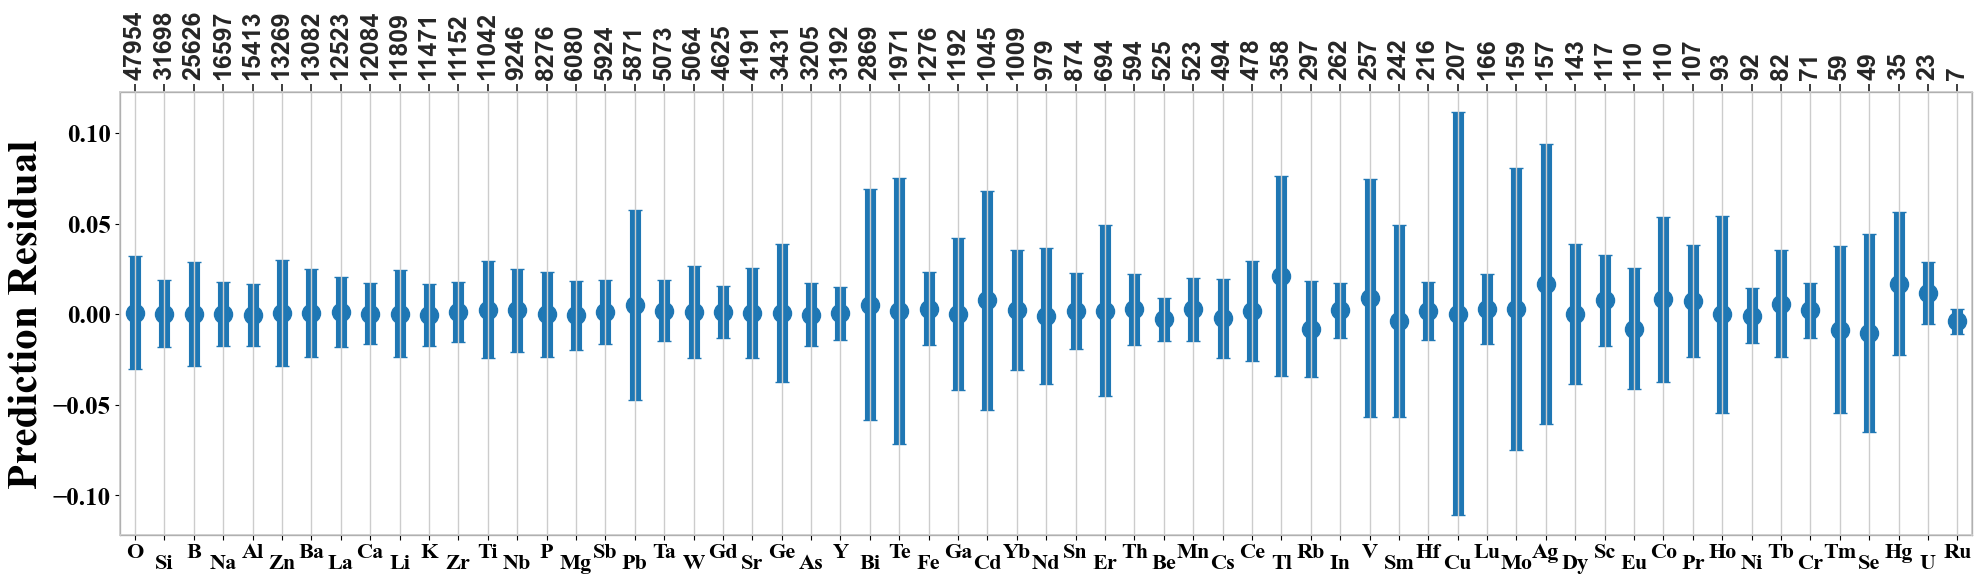

In [26]:
plot_residuos_por_elemento(df_resultado)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuos_por_elemento(df):
    plt.rcParams["font.family"] = "Times New Roman"  # <- altera a fonte para Times

    # Identifica colunas que são elementos (tudo exceto RefractiveIndex e Previsao)
    element_columns = [col for col in df.columns if col not in ['RefractiveIndex', 'Previsao']]
    
    means = []
    stds = []
    freqs = []
    valid_elements = []

    for element in element_columns:
        mask = df[element] > 0
        if mask.any():
            error = df.loc[mask, 'RefractiveIndex'] - df.loc[mask, 'Previsao']
            means.append(error.mean())
            stds.append(error.std())
            freqs.append(mask.sum())
            valid_elements.append(element)

    # Ordena por frequência decrescente
    sorted_data = sorted(zip(freqs, valid_elements, means, stds), reverse=True)
    sorted_freqs, sorted_elements, sorted_means, sorted_stds = zip(*sorted_data)

    x_pos = list(range(len(sorted_elements)))

    # Plot
    fig, ax = plt.subplots(figsize=(20, 6))
    sns.set(style="whitegrid", palette="gray")  # <- força cores em tons de cinza

    ax.errorbar(
        x_pos,
        sorted_means,
        yerr=sorted_stds,
        fmt='o',
        capsize=5,
        elinewidth=8,
        markersize=13,
        color='black'  # <- cor preta
    )

    # Ajusta os ticks do eixo X
    ax.set_xticks(x_pos)
    ax.set_xticklabels(sorted_elements, fontsize=16, fontweight='bold')

    # Alterna a posição vertical dos rótulos
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_y(0.005 if i % 2 == 0 else -0.02)

    # Eixo Y
    ax.tick_params(axis='y', labelsize=18)
    for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
    ax.set_ylabel('Prediction Residual', fontsize=30, fontweight='bold')

    # Limita o eixo X para não deixar espaço extra
    ax.set_xlim(-0.5, len(x_pos) - 0.5)

    # Frequências no topo
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # mesma escala do eixo principal
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([str(f) for f in sorted_freqs], rotation=90, fontsize=18, fontweight='bold')

    plt.tight_layout()
    plt.show()


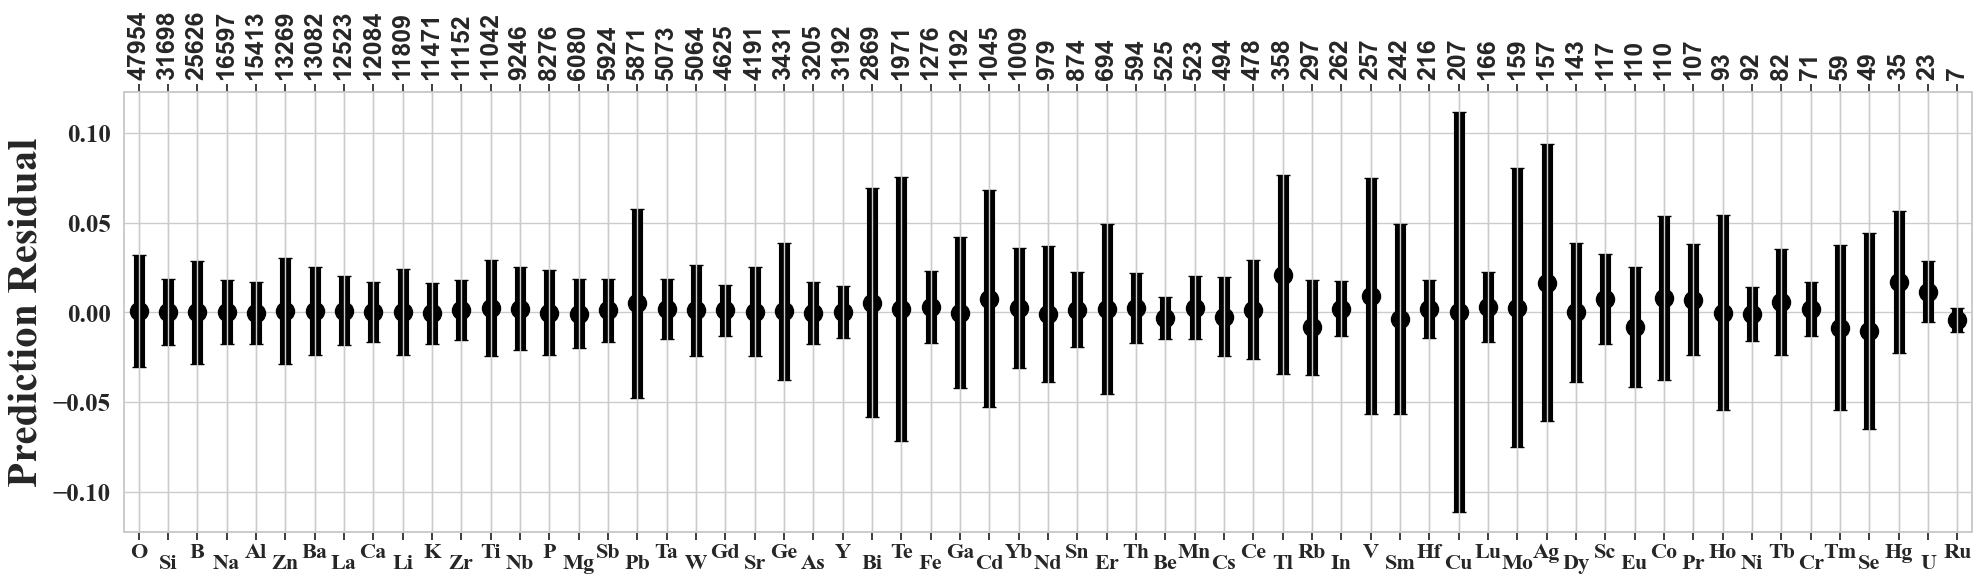

In [28]:
plot_residuos_por_elemento(df_resultado)

## r^2

In [29]:
def calcular_r2_e_frequencia_por_elemento_unico(df_resultado):
    # Seleciona as colunas que são elementos (exclui RefractiveIndex e Previsao)
    colunas_elementos = [col for col in df_resultado.columns if col not in ['RefractiveIndex', 'Previsao']]
    
    resultado = {}
    for elemento in colunas_elementos:
        mask = df_resultado[elemento] > 0
        freq = mask.sum()
        
        if freq >= 2:
            r2 = r2_score(df_resultado.loc[mask, 'RefractiveIndex'], df_resultado.loc[mask, 'Previsao'])
        else:
            r2 = None
        
        resultado[elemento] = {'r2': r2, 'freq': freq}
    
    return resultado


In [30]:
resultado_elementos = calcular_r2_e_frequencia_por_elemento_unico(df_resultado)

for elemento, valores in resultado_elementos.items():
    print(f"Elemento: {elemento} -> R²: {valores['r2']}, Frequência: {valores['freq']}")

Elemento: Li -> R²: 0.9746395048604759, Frequência: 11809
Elemento: Be -> R²: 0.9853622173576528, Frequência: 525
Elemento: B -> R²: 0.9700153623401147, Frequência: 25626
Elemento: O -> R²: 0.971542586216184, Frequência: 47954
Elemento: Na -> R²: 0.9827045341496915, Frequência: 16597
Elemento: Mg -> R²: 0.9696131973984429, Frequência: 6080
Elemento: Al -> R²: 0.9792396993698173, Frequência: 15413
Elemento: Si -> R²: 0.9854280962700447, Frequência: 31698
Elemento: P -> R²: 0.976108106914739, Frequência: 8276
Elemento: K -> R²: 0.9848026632821503, Frequência: 11471
Elemento: Ca -> R²: 0.9832105679185748, Frequência: 12084
Elemento: Sc -> R²: 0.9626617721666278, Frequência: 117
Elemento: Ti -> R²: 0.979147916863383, Frequência: 11042
Elemento: V -> R²: 0.9310643815840643, Frequência: 257
Elemento: Cr -> R²: 0.9965130350417875, Frequência: 71
Elemento: Mn -> R²: 0.9823743032189098, Frequência: 523
Elemento: Fe -> R²: 0.9678189116712363, Frequência: 1276
Elemento: Co -> R²: 0.96402462137167

In [31]:
def plot_r2_por_elemento_unico(resultado_elementos):
    dados_plot = []
    
    # Filtrar apenas elementos com r2 != None
    for elemento, valores in resultado_elementos.items():
        r2 = valores['r2']
        freq = valores['freq']
        if r2 is not None:
            dados_plot.append({'Elemento': elemento, 'R2': r2, 'Frequencia': freq})
    
    # Ordenar por frequência decrescente
    dados_plot.sort(key=lambda x: x['Frequencia'], reverse=True)
    
    elementos = [d['Elemento'] for d in dados_plot]
    r2s = [d['R2'] for d in dados_plot]
    frequencias = [d['Frequencia'] for d in dados_plot]
    
    plt.figure(figsize=(16, 6))
    sns.set(style="whitegrid")
    
    barras = []
    for i, r2 in enumerate(r2s):
        if r2 < 0:
            barras.append(plt.bar(elementos[i], 0, color='red'))  # barra altura 0 para marcar negativo
        else:
            barras.append(plt.bar(elementos[i], r2, color='skyblue'))
    
    plt.xticks(rotation=90)
    ax = plt.gca()
    ax.set_xlabel('Elemento (com frequência abaixo)')
    ax.set_ylabel('R²')
    plt.title('R² por Elemento (ordenado por frequência)')
    
    for i, barlist in enumerate(barras):
        bar = barlist.patches[0]
        freq = frequencias[i]
        r2 = r2s[i]
        
        # Frequência abaixo do eixo x
        plt.text(
            bar.get_x() + bar.get_width()/2,
            -0.05,
            f"{freq}",
            ha='center',
            va='top',
            fontsize=8,
            rotation=90,
            color='gray'
        )
        
        # Valor de R² acima da barra
        if r2 >= 0:
            altura = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2,
                altura + 0.01,
                f"{r2:.2f}",
                ha='center',
                va='bottom',
                fontsize=9,
                rotation=90
            )
        else:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                0.05,
                '*',
                ha='center',
                va='bottom',
                fontsize=14,
                color='red'
            )
    
    plt.ylim(bottom=-0.1, top=max([r for r in r2s if r >= 0] + [0]) + 0.15)
    plt.tight_layout()
    plt.show()


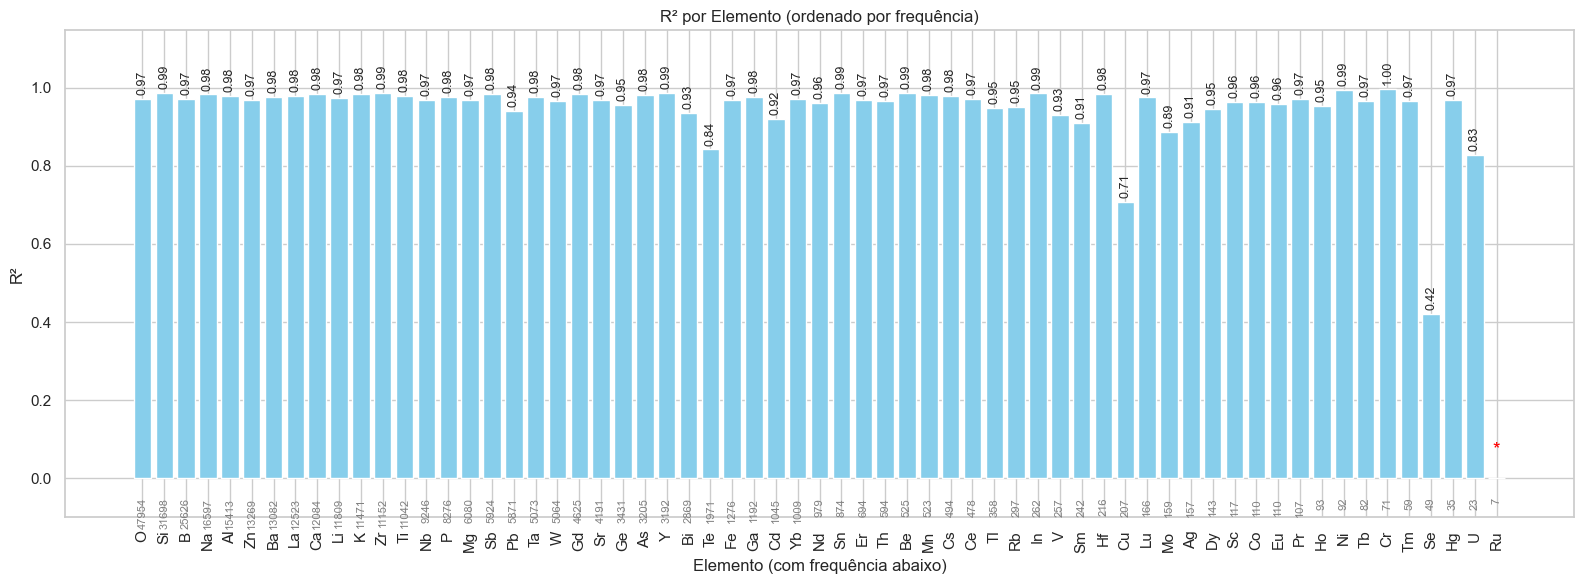

In [32]:
plot_r2_por_elemento_unico(resultado_elementos)

## Plot ND

In [33]:
def plot_refractiveindex_ordenado(df_resultado):
    # Ordena o DataFrame pelo valor de RefractiveIndex
    df_ordenado = df_resultado.sort_values(by='RefractiveIndex')
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_ordenado['RefractiveIndex'].values, marker='o', linestyle='-')
    plt.title('RefractiveIndex(ordenado do menor para o maior) em cotovelo')
    plt.xlabel('Posição (ordenada)')
    plt.ylabel('RefractiveIndex')
    plt.grid(True)
    plt.show()


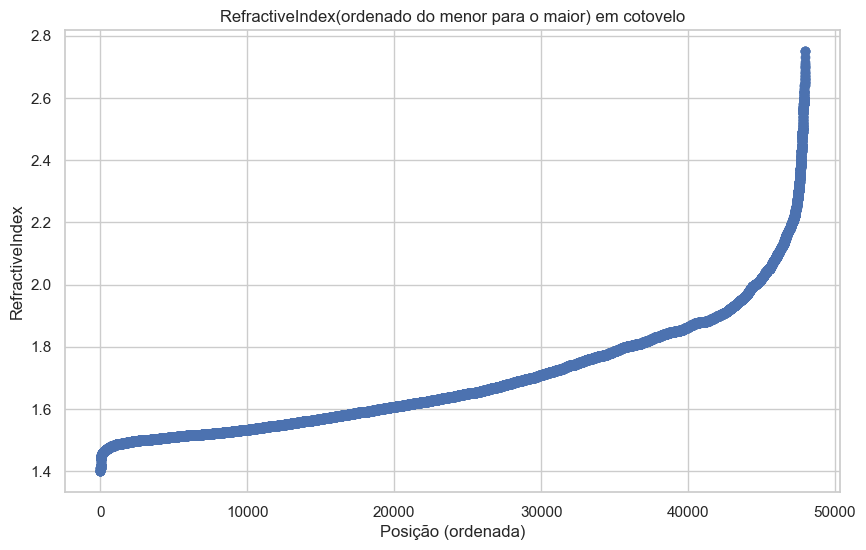

In [34]:
plot_refractiveindex_ordenado(df_resultado)

In [35]:
def elementos_com_aparicoes_menores(df_resultado, limite=208):
    # Considera as colunas de elementos (todas exceto 'RefractiveIndex' e 'Previsao')
    elementos = [col for col in df_resultado.columns if col not in ['RefractiveIndex', 'Previsao']]
    
    # Contar amostras onde o elemento aparece (valor > 0)
    contagem_aparicoes = {elem: (df_resultado[elem] > 0).sum() for elem in elementos}
    
    # Selecionar elementos com aparições menores que o limite
    elementos_filtrados = [elem for elem, contagem in contagem_aparicoes.items() if contagem < limite]
    
    return elementos_filtrados

# Exemplo de uso:
elementos_pouco_frequentes = elementos_com_aparicoes_menores(df_resultado, limite=208)
print(elementos_pouco_frequentes)


['Sc', 'Cr', 'Co', 'Ni', 'Cu', 'Se', 'Mo', 'Ru', 'Ag', 'Pr', 'Eu', 'Tb', 'Dy', 'Ho', 'Tm', 'Lu', 'Hg', 'U']


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.ndimage import uniform_filter1d

def plot_erro_vs_refractiveindex_com_destque(
    df_resultado, 
    indices_maiores_erros, 
    erro_de_corte, 
    window=200
):
    df_ordenado = df_resultado.sort_values('RefractiveIndex').copy()

    erro = np.abs(df_ordenado['RefractiveIndex'] - df_ordenado['Previsao'])
    erro_suave = uniform_filter1d(erro, size=window)
    deslocamento = erro_de_corte - np.min(erro_suave)
    erro_suave_deslocado = erro_suave + deslocamento

    def tem_elemento_pouco_frequente(linha):
        return any((el in df_ordenado.columns and getattr(linha, el) > 0) for el in elementos_pouco_frequentes)

    elementos_marcados_circulo = [28252, 29601, 29602, 36935, 40092, 40093, 40094, 41246, 44537]
    elemento_marcado_x = 39076

    cores = []
    indices_acima_da_curva = []

    for i, linha in enumerate(df_ordenado.itertuples()):
        idx = df_ordenado.index[i]
        if tem_elemento_pouco_frequente(linha):
            cores.append('green')
        elif erro.iloc[i] <= erro_suave_deslocado[i]:
            cores.append('blue')
        else:
            cores.append('red')
            indices_acima_da_curva.append(idx)

    # Remover o elemento 39076 dos índices acima da curva (se estiver presente)
    if elemento_marcado_x in indices_acima_da_curva:
        indices_acima_da_curva.remove(elemento_marcado_x)

    plt.figure(figsize=(12, 7))
    plt.scatter(df_ordenado['RefractiveIndex'], erro, alpha=0.5, c=cores, edgecolor='k')

    plt.plot(df_ordenado['RefractiveIndex'], erro_suave_deslocado, color='purple', linewidth=2)
    plt.axhline(y=erro_de_corte, color='orange', linestyle='--', linewidth=2)

    # Marcadores especiais: círculos e X pretos
    df_circulo = df_ordenado.loc[elementos_marcados_circulo]
    plt.scatter(
        df_circulo['RefractiveIndex'], 
        np.abs(df_circulo['RefractiveIndex'] - df_circulo['Previsao']),
        facecolors='none', 
        edgecolors='black',  # borda preta
        s=60,
        linewidths=1
    )

    df_x = df_ordenado.loc[[elemento_marcado_x]]
    plt.scatter(
        df_x['RefractiveIndex'],
        np.abs(df_x['RefractiveIndex'] - df_x['Previsao']),
        color='black',  # X preto
        marker='x',
        s=60,
        linewidths=1
    )

    yticks = plt.yticks()[0]
    if erro_de_corte not in yticks:
        plt.yticks(np.append(yticks, erro_de_corte))

    plt.ylim(bottom=0)

    circulo_legend = mlines.Line2D([], [], color='black', marker='o', markersize=10, markerfacecolor='none',
                                  label='Elementos mantidos como outliers (native)', linestyle='None')
    x_legend = mlines.Line2D([], [], color='black', marker='x', markersize=10,
                            label='Elemento desclassificado como outlier (native)', linestyle='None')

    azul_patch = mpatches.Patch(color='blue', label='Erro abaixo da curva')
    vermelho_patch = mpatches.Patch(color='red', label='Erro acima da curva')
    verde_patch = mpatches.Patch(color='green', label='Elemento pouco frequente')
    roxo_patch = mpatches.Patch(color='purple', label='Curva de erro médio deslocada')
    corte_patch = mpatches.Patch(color='orange', label='Valor de corte(Kneedle)')

    plt.legend(handles=[
        azul_patch, vermelho_patch, verde_patch, roxo_patch, corte_patch,
        circulo_legend, x_legend
    ], loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0., fontsize=10)

    plt.title('Erro absoluto vs RefractiveIndex (com destaque especial para alguns elementos)')
    plt.xlabel('RefractiveIndex')
    plt.ylabel('Erro absoluto')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return indices_acima_da_curva


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.ndimage import uniform_filter1d

def plot_erro_vs_refractiveindex_com_destque(
    df_resultado, 
    indices_maiores_erros, 
    erro_de_corte, 
    window=200
):
    plt.rcParams["font.family"] = "Times New Roman"  # <- altera a fonte para Times

    df_ordenado = df_resultado.sort_values('RefractiveIndex').copy()

    erro = np.abs(df_ordenado['RefractiveIndex'] - df_ordenado['Previsao'])
    erro_suave = uniform_filter1d(erro, size=window)
    deslocamento = erro_de_corte - np.min(erro_suave)
    erro_suave_deslocado = erro_suave + deslocamento

    def tem_elemento_pouco_frequente(linha):
        return any((el in df_ordenado.columns and getattr(linha, el) > 0) for el in elementos_pouco_frequentes)

    elementos_marcados_circulo = [28252, 29601, 29602, 36935, 40092, 40093, 40094, 41246, 44537]
    elemento_marcado_x = 39076

    cores = []
    indices_acima_da_curva = []

    for i, linha in enumerate(df_ordenado.itertuples()):
        idx = df_ordenado.index[i]
        if tem_elemento_pouco_frequente(linha):
            cores.append('green')
        elif erro.iloc[i] <= erro_suave_deslocado[i]:
            cores.append('blue')
        else:
            cores.append('red')
            indices_acima_da_curva.append(idx)

    if elemento_marcado_x in indices_acima_da_curva:
        indices_acima_da_curva.remove(elemento_marcado_x)

    plt.figure(figsize=(14, 8))
    plt.scatter(
        df_ordenado['RefractiveIndex'],
        erro,
        alpha=0.6,
        c=cores,
        edgecolor='k',
        s=100
    )

    plt.plot(
        df_ordenado['RefractiveIndex'],
        erro_suave_deslocado,
        color='purple',
        linewidth=5,
        label='Shifted average error curve'
    )
    plt.axhline(
        y=erro_de_corte,
        color='orange',
        linestyle='--',
        linewidth=5,
        label='Cutoff value (Kneedle)'
    )

    df_circulo = df_ordenado.loc[elementos_marcados_circulo]
    plt.scatter(
        df_circulo['RefractiveIndex'], 
        np.abs(df_circulo['RefractiveIndex'] - df_circulo['Previsao']),
        facecolors='none', 
        edgecolors='black',
        s=150,
        linewidths=4
    )

    df_x = df_ordenado.loc[[elemento_marcado_x]]
    plt.scatter(
        df_x['RefractiveIndex'],
        np.abs(df_x['RefractiveIndex'] - df_x['Previsao']),
        color='black',
        marker='x',
        s=150,
        linewidths=4
    )

    yticks = plt.yticks()[0]
    if erro_de_corte not in yticks:
        plt.yticks(np.append(yticks, erro_de_corte))

    plt.ylim(bottom=0)

    circulo_legend = mlines.Line2D([], [], color='black', marker='o', markersize=10, markerfacecolor='none',
                                   label='Kept as outliers (native)', linestyle='None')
    x_legend = mlines.Line2D([], [], color='black', marker='x', markersize=10,
                              label='Removed as outlier (native)', linestyle='None')
    
    azul_patch = mpatches.Patch(color='blue', label='Error below curve')
    vermelho_patch = mpatches.Patch(color='red', label='Error above curve')
    verde_patch = mpatches.Patch(color='green', label='Rare element')
    roxo_patch = mpatches.Patch(color='purple', label='Shifted average error curve')
    corte_patch = mpatches.Patch(color='orange', label='Cutoff value (Kneedle)')

    plt.legend(
        handles=[
            azul_patch, vermelho_patch, verde_patch, roxo_patch, corte_patch,
            circulo_legend, x_legend
        ],
        loc='upper center',
        bbox_to_anchor=(0.5, 0.98),  # centralizado, ajusta altura conforme necessário
        ncol=2,                      # 2 colunas para economizar espaço
        fontsize=16,
        frameon=True,
        fancybox=True,
        borderpad=0.7
    )

    plt.xlabel('Refractive Index', fontsize=20, fontweight='bold')
    plt.ylabel('Absolute Error', fontsize=20, fontweight='bold')

    plt.xticks(fontsize=16, fontweight='bold')  # tamanho e negrito nos valores do eixo x
    plt.yticks(fontsize=16, fontweight='bold')  # tamanho e negrito nos valores do eixo y

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return indices_acima_da_curva


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.ndimage import uniform_filter1d

def plot_erro_vs_refractiveindex_com_destque(
    df_resultado, 
    indices_maiores_erros, 
    erro_de_corte, 
    window=200
):
    plt.rcParams["font.family"] = "Times New Roman"

    df_ordenado = df_resultado.sort_values('RefractiveIndex').copy()
    erro = np.abs(df_ordenado['RefractiveIndex'] - df_ordenado['Previsao'])
    erro_suave = uniform_filter1d(erro, size=window)
    deslocamento = erro_de_corte - np.min(erro_suave)
    erro_suave_deslocado = erro_suave + deslocamento

    def tem_elemento_pouco_frequente(linha):
        return any((el in df_ordenado.columns and getattr(linha, el) > 0) for el in elementos_pouco_frequentes)

    elementos_marcados_circulo = [28252, 29601, 29602, 36935, 40092, 40093, 40094, 41246, 44537]
    elemento_marcado_x = 39076  # hexágono

    # Classificar pontos em grupos para símbolos PB
    indices_erro_abaixo = []
    indices_erro_acima = []
    indices_raros = []

    for i, linha in enumerate(df_ordenado.itertuples()):
        idx = df_ordenado.index[i]
        if tem_elemento_pouco_frequente(linha):
            indices_raros.append(idx)
        elif erro.iloc[i] <= erro_suave_deslocado[i]:
            indices_erro_abaixo.append(idx)
        else:
            indices_erro_acima.append(idx)

    if elemento_marcado_x in indices_erro_acima:
        indices_erro_acima.remove(elemento_marcado_x)

    indices_acima_da_curva = indices_erro_acima.copy()

    plt.figure(figsize=(14, 8))

    # Triângulos abaixo da curva: cinza sólido
    if indices_erro_abaixo:
        plt.scatter(
            df_ordenado.loc[indices_erro_abaixo, 'RefractiveIndex'],
            erro.loc[indices_erro_abaixo],
            marker='^', edgecolor='black', facecolor='0.6',
            s=100, linewidth=2, alpha=1.0, zorder=2
        )
    # Triângulos acima da curva: brancos
    if indices_erro_acima:
        plt.scatter(
            df_ordenado.loc[indices_erro_acima, 'RefractiveIndex'],
            erro.loc[indices_erro_acima],
            marker='^', edgecolor='black', facecolor='white',
            s=100, linewidth=2, alpha=0.5, zorder=2
        )
    # Estrelas: raros
    if indices_raros:
        plt.scatter(
            df_ordenado.loc[indices_raros, 'RefractiveIndex'],
            erro.loc[indices_raros],
            marker='*', edgecolor='black', facecolor='white',
            s=100, linewidth=2, alpha=0.5, zorder=2
        )

    # Curva suavizada e linha de corte
    plt.plot(
        df_ordenado['RefractiveIndex'],
        erro_suave_deslocado,
        color='black', linewidth=3, linestyle='-', label='Shifted average error curve', zorder=1
    )
    plt.axhline(
        y=erro_de_corte,
        color='black', linewidth=3, linestyle='--', label='Cutoff value (Kneedle)', zorder=1
    )

    # Círculos vazados
    df_circulo = df_ordenado.loc[elementos_marcados_circulo]
    plt.scatter(
        df_circulo['RefractiveIndex'],
        np.abs(df_circulo['RefractiveIndex'] - df_circulo['Previsao']),
        facecolors='none', edgecolors='black', s=150, linewidths=1, zorder=3
    )

    # Repintar símbolos dentro dos círculos
    for idx in elementos_marcados_circulo:
        valor_x = df_ordenado.loc[idx, 'RefractiveIndex']
        valor_y = np.abs(df_ordenado.loc[idx, 'RefractiveIndex'] - df_ordenado.loc[idx, 'Previsao'])
        if idx in indices_erro_abaixo:
            plt.scatter(valor_x, valor_y, marker='^', edgecolor='black', facecolor='0.6', s=100, linewidth=2, alpha=1.0, zorder=4)
        elif idx in indices_erro_acima:
            plt.scatter(valor_x, valor_y, marker='^', edgecolor='black', facecolor='white', s=100, linewidth=2, alpha=0.5, zorder=4)
        elif idx in indices_raros:
            plt.scatter(valor_x, valor_y, marker='*', edgecolor='black', facecolor='white', s=100, linewidth=2, alpha=0.5, zorder=4)

    # Hexágono outlier: contornado, maior e linha mais fina
    df_x = df_ordenado.loc[[elemento_marcado_x]]
    valor_x = df_x['RefractiveIndex'].values[0]
    valor_y = np.abs(df_x['RefractiveIndex'].values[0] - df_x['Previsao'].values[0])
    # Repintar símbolo original por baixo
    if elemento_marcado_x in indices_erro_abaixo:
        plt.scatter(valor_x, valor_y, marker='^', edgecolor='black', facecolor='0.6', s=100, linewidth=2, alpha=1.0, zorder=5)
    elif elemento_marcado_x in indices_erro_acima:
        plt.scatter(valor_x, valor_y, marker='^', edgecolor='black', facecolor='white', s=100, linewidth=2, alpha=0.5, zorder=5)
    elif elemento_marcado_x in indices_raros:
        plt.scatter(valor_x, valor_y, marker='*', edgecolor='black', facecolor='white', s=100, linewidth=2, alpha=0.5, zorder=5)
    # Hexágono contornado maior
    plt.scatter(valor_x, valor_y, facecolors='none', edgecolor='black', marker='h', s=250, linewidths=1.5, zorder=6)

    # Ajustes de eixo e ticks
    yticks = plt.yticks()[0]
    if erro_de_corte not in yticks:
        plt.yticks(np.append(yticks, erro_de_corte))
    plt.ylim(bottom=0)
    plt.xlabel('Refractive Index', fontsize=20, fontweight='bold')
    plt.ylabel('Absolute Error', fontsize=20, fontweight='bold')
    plt.xticks(fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16, fontweight='bold')
    plt.grid(True)
    plt.tight_layout()

    # Legenda PB
    triangulo_preenchido_legend = mlines.Line2D([], [], color='black', marker='^', markersize=10, markerfacecolor='0.6', linestyle='None', label='Error below curve')
    triangulo_branco_legend = mlines.Line2D([], [], color='black', marker='^', markersize=10, markerfacecolor='white', linestyle='None', label='Error above curve')
    estrela_legend = mlines.Line2D([], [], color='black', marker='*', markersize=10, markerfacecolor='white', linestyle='None', label='Rare element')
    curva_legend = mlines.Line2D([], [], color='black', linewidth=3, linestyle='-', label='Shifted average error curve')
    corte_legend = mlines.Line2D([], [], color='black', linewidth=3, linestyle='--', label='Cutoff value (Kneedle)')
    circulo_outlier = mlines.Line2D([], [], color='black', marker='o', markersize=10, markerfacecolor='none', linestyle='None', label='Kept as outliers (native)')
    hex_outlier = mlines.Line2D([], [], color='black', marker='h', markersize=12, markerfacecolor='none', linestyle='None', label='Removed as outlier (native)')

    plt.legend(
        handles=[triangulo_preenchido_legend, triangulo_branco_legend, estrela_legend, curva_legend, corte_legend, circulo_outlier, hex_outlier],
        loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=16, frameon=True, fancybox=True, borderpad=0.7
    )

    plt.show()
    return indices_acima_da_curva


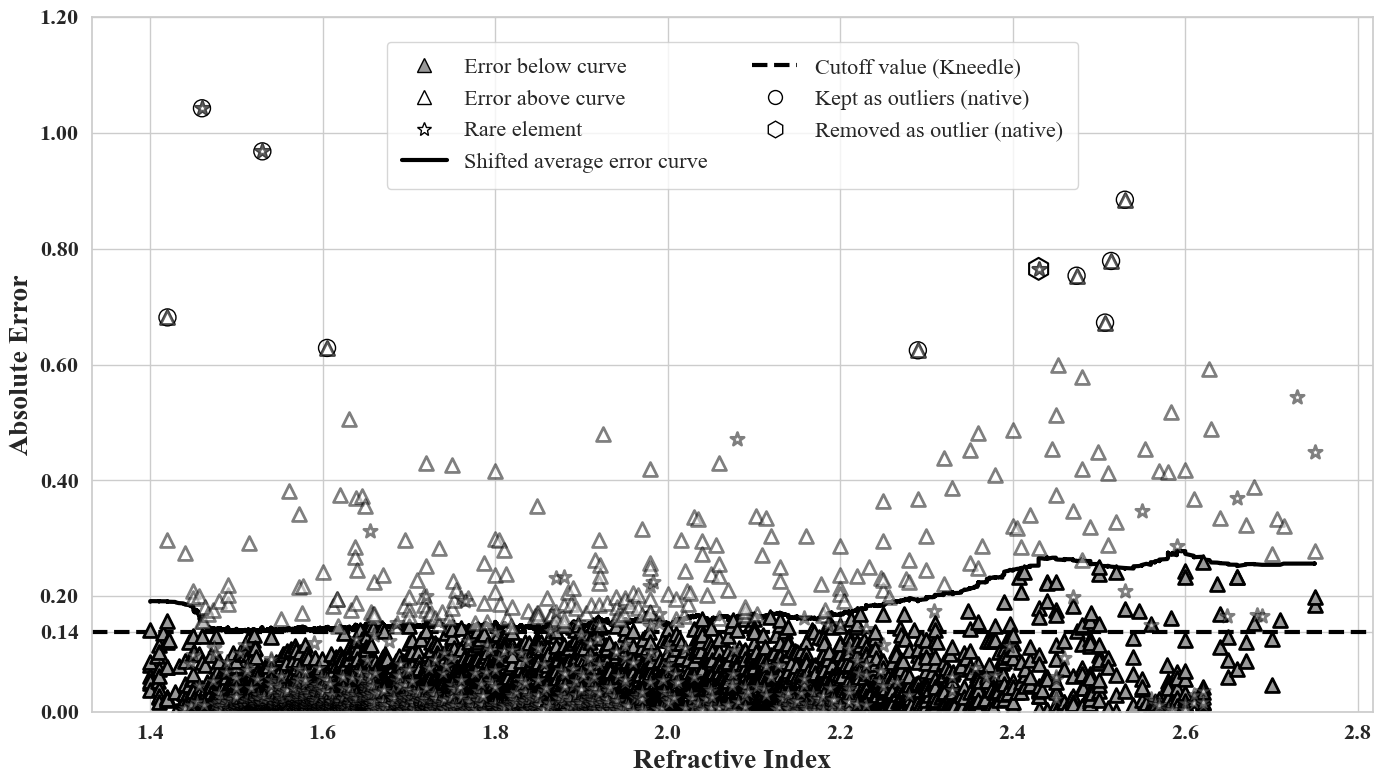

,RefractiveIndex,Previsao,Li,Be,B,O,Na,Mg,Al,Si,...,Lu,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U
46808,1.420,1.717782,0.000000,0.0,0.295000,0.600000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,0.0,0.0
36935,1.420,2.101494,0.000000,0.0,0.206186,0.597938,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.185567,0.0,0.0
46809,1.440,1.715631,0.000000,0.0,0.290000,0.600000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,0.0,0.0
41983,1.450,1.659654,0.000000,0.0,0.000000,0.650000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.075000,0.000000,0.0,0.0
41988,1.450,1.647263,0.000000,0.0,0.000000,0.666667,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40085,2.680,2.291180,0.000000,0.0,0.000000,0.626998,0.0,0.0,0.035524,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.101243,0.000000,0.0,0.0
18839,2.700,2.426513,0.000000,0.0,0.000000,0.643239,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
37087,2.706,2.371888,0.000000,0.0,0.065934,0.593407,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.307692,0.0,0.0
37086,2.714,2.393283,0.022472,0.0,0.067416,0.584270,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.292135,0.0,0.0


In [94]:
indices_acima = plot_erro_vs_refractiveindex_com_destque(df_resultado, indices_maiores_erros, erro_de_corte)
df_acima = df_resultado.loc[indices_acima]
df_acima

In [28]:
import numpy as np
from scipy.ndimage import uniform_filter1d

def calcular_indices_acima_da_curva(
    df_resultado, 
    indices_maiores_erros, 
    erro_de_corte, 
    window=200
):
    df_ordenado = df_resultado.sort_values('RefractiveIndex').copy()

    erro = np.abs(df_ordenado['RefractiveIndex'] - df_ordenado['Previsao'])
    erro_suave = uniform_filter1d(erro, size=window)
    deslocamento = erro_de_corte - np.min(erro_suave)
    erro_suave_deslocado = erro_suave + deslocamento

    def tem_elemento_pouco_frequente(linha):
        return any((el in df_ordenado.columns and getattr(linha, el) > 0) for el in elementos_pouco_frequentes)

    elemento_marcado_x = 39076
    indices_acima_da_curva = []

    for i, linha in enumerate(df_ordenado.itertuples()):
        idx = df_ordenado.index[i]
        if tem_elemento_pouco_frequente(linha):
            continue
        elif erro.iloc[i] > erro_suave_deslocado[i]:
            if idx != elemento_marcado_x:
                indices_acima_da_curva.append(idx)

    return indices_acima_da_curva


In [29]:
indices_acima = calcular_indices_acima_da_curva(df_resultado, indices_maiores_erros, erro_de_corte)
indices_acima

[46808,
 36935,
 46809,
 41983,
 41988,
 47533,
 46810,
 28246,
 42078,
 28247,
 28248,
 31060,
 14099,
 14096,
 28249,
 28250,
 35345,
 28251,
 2454,
 2455,
 12474,
 20667,
 9358,
 28252,
 40321,
 29549,
 11020,
 11060,
 36936,
 9347,
 9369,
 9360,
 9368,
 13843,
 9348,
 32240,
 25254,
 9564,
 35330,
 8190,
 12331,
 31046,
 35963,
 47558,
 19229,
 11341,
 31398,
 11660,
 14013,
 41975,
 9378,
 11344,
 33418,
 34281,
 44173,
 11298,
 13853,
 34715,
 35962,
 32089,
 11152,
 26566,
 11151,
 11567,
 27855,
 37964,
 37966,
 37965,
 36857,
 8239,
 47836,
 9351,
 44172,
 44161,
 45344,
 16955,
 29922,
 33197,
 5281,
 29489,
 34505,
 8233,
 16669,
 16976,
 23820,
 26573,
 5909,
 33196,
 33535,
 43162,
 23048,
 2966,
 11951,
 33544,
 44171,
 13728,
 41198,
 33541,
 33534,
 33533,
 33034,
 37712,
 19873,
 36402,
 40692,
 45389,
 29155,
 33033,
 43595,
 33194,
 32410,
 29492,
 31411,
 46344,
 11451,
 44627,
 32795,
 36871,
 26576,
 44628,
 25853,
 42466,
 20120,
 20092,
 39806,
 37123,
 30783,
 

#Cálculo do erro absoluto
df_resultado['ErroAbsoluto'] = np.abs(df_resultado['RefractiveIndex'] - df_resultado['Previsao'])

#Função para verificar se a amostra contém ao menos um elemento pouco frequente
def contem_elemento_pouco_frequente(linha):
    return any((el in df_resultado.columns and linha[el] > 0) for el in elementos_pouco_frequentes)

#Filtragem
amostras_filtradas = df_resultado[
    df_resultado.apply(contem_elemento_pouco_frequente, axis=1) &
    (df_resultado['ErroAbsoluto'] > 0.4)
]

#Resultado
print("Amostras com elementos pouco frequentes e erro > 0.6:")
print(amostras_filtradas)

caminho_arquivo = '/Users/joao altarugio/Desktop/Projeto LaMav/data/amostras_elementos_raros_erro_alto_2.xlsx'
amostras_filtradas.to_excel(caminho_arquivo, engine='openpyxl')  # Mantém o índice

print(f"Amostras salvas com índice original em: {caminho_arquivo}")

#Salva como Excel
elementos_com_erro_maior_que_algo.to_excel('/Users/joao altarugio/Desktop/Projeto LaMav/data/elementos_com_erro_maior_que_0.6.xlsx', index=True)

# Removendo elementos de indices_maiores_erros

In [30]:
indices_df_resultado_filtrado_3 = df_acima.index.to_numpy()
len(indices_df_resultado_filtrado_3)

235

In [31]:
df_filtrado = df.drop(index=indices_df_resultado_filtrado_3)


In [32]:
df_filtrado

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U,RefractiveIndex
0,0.0,0.0,0.0,0.630000,0.073333,0.000000,0.000000,0.036667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657
1,0.0,0.0,0.0,0.624881,0.070428,0.019714,0.000000,0.035214,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.651
2,0.0,0.0,0.0,0.620012,0.067698,0.038418,0.000000,0.033849,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.648
3,0.0,0.0,0.0,0.615143,0.064971,0.057114,0.000000,0.032485,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.644
4,0.0,0.0,0.0,0.622678,0.069171,0.000000,0.000000,0.034586,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47949,0.0,0.0,0.0,0.614246,0.068289,0.009847,0.063813,0.230730,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.503
47950,0.0,0.0,0.0,0.610767,0.080119,0.006285,0.063486,0.229851,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500
47951,0.0,0.0,0.0,0.613590,0.078927,0.006285,0.062479,0.226399,0.006004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.495
47952,0.0,0.0,0.0,0.610737,0.080132,0.006350,0.063369,0.229761,0.000063,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500


#Caminho onde você quer salvar — altere se quiser salvar em outro local
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/df_filtrado.pkl"

#Salvando o dicionário em arquivo
with open(caminho_arquivo, "wb") as f:
    pickle.dump(df_filtrado, f)

print(f"Arquivo salvo com sucesso em: {caminho_arquivo}")

# cv_02

In [29]:
X = df_filtrado.drop(columns=['RefractiveIndex'])
y = df_filtrado['RefractiveIndex']

# Inicializa o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define os modelos
modelos = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'RandomForest': RandomForestRegressor(n_estimators=390, max_features='sqrt', random_state=42),
    'DecisionTree': DecisionTreeRegressor(criterion='friedman_mse', min_impurity_decrease=0.0012, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=390, max_features='sqrt', random_state=42),
    "XGBoost": XGBRegressor(n_estimators=390, random_state=42, verbosity=0),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=390, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=390, random_state=42)
}

# DataFrame para armazenar resultados
resultados_finais = pd.DataFrame(index=X.index)
resultados_finais['RefractiveIndex_real'] = y

# Inicializa colunas de previsão
for nome in modelos.keys():
    resultados_finais[nome + '_pred'] = np.nan

# Validação cruzada
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train = y.iloc[train_idx]

    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X.iloc[val_idx])
        resultados_finais.loc[X.iloc[val_idx].index, nome + '_pred'] = y_pred

# Exibe as primeiras linhas do DataFrame com previsões
print(resultados_finais.head())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10396
[LightGBM] [Info] Number of data points in the train set: 42947, number of used features: 62
[LightGBM] [Info] Start training from score 1.690555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10404
[LightGBM] [Info] Number of data points in the train set: 42947, number of used features: 62
[LightGBM] [Info] Start training from score 1.691606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [30]:
resultados_finais

,RefractiveIndex_real,KNN_pred,RandomForest_pred,DecisionTree_pred,ExtraTrees_pred,XGBoost_pred,HistGradientBoosting_pred,LightGBM_pred
0,1.657,1.6538,1.652809,1.659643,1.653000,1.653907,1.645758,1.647592
1,1.651,1.6558,1.656979,1.648667,1.659374,1.652405,1.649290,1.651624
2,1.648,1.6560,1.654259,1.673571,1.653203,1.654256,1.644357,1.650708
3,1.644,1.6560,1.664071,1.665733,1.655418,1.649366,1.643073,1.645863
4,1.676,1.6644,1.674387,1.682944,1.675921,1.670309,1.664740,1.671052
...,...,...,...,...,...,...,...,...
47949,1.503,1.4990,1.501367,1.503880,1.502369,1.502204,1.499189,1.502243
47950,1.500,1.4994,1.501679,1.510081,1.500246,1.502540,1.496501,1.498617
47951,1.495,1.5004,1.501570,1.508056,1.502964,1.499560,1.499645,1.499012
47952,1.500,1.4994,1.502041,1.509600,1.501384,1.503592,1.496738,1.494752


In [31]:
#Caminho onde você quer salvar — altere se quiser salvar em outro local
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_finais_edgar_02.pkl"

#Salvando o dicionário em arquivo
with open(caminho_arquivo, "wb") as f:
    pickle.dump(resultados_finais, f)

print(f"Arquivo salvo com sucesso em: {caminho_arquivo}")

Arquivo salvo com sucesso em: /Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_finais_edgar_02.pkl


# Metricas

In [33]:
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_edgar.pkl"
with open(caminho_arquivo, "rb") as f:
   resultados = pickle.load(f)

In [34]:
resultados = resultados.drop(columns='SVR_pred')

In [35]:
resultados

,RefractiveIndex_real,KNN_pred,RandomForest_pred,DecisionTree_pred,ExtraTrees_pred
0,1.657,1.6538,1.654401,1.656974,1.654500
1,1.651,1.6558,1.653282,1.648667,1.659433
2,1.648,1.6560,1.658515,1.649667,1.655062
3,1.644,1.6574,1.665067,1.698500,1.653687
4,1.676,1.6644,1.677136,1.686800,1.675546
...,...,...,...,...,...
47949,1.503,1.4990,1.501991,1.518496,1.502242
47950,1.500,1.4972,1.501636,1.492980,1.500959
47951,1.495,1.5004,1.502593,1.508214,1.502759
47952,1.500,1.4972,1.502513,1.508722,1.501992


In [36]:
colunas_pred = [
    "KNN_pred",
    "RandomForest_pred",
    "DecisionTree_pred",
    "ExtraTrees_pred"
]

colunas_usadas = ["RefractiveIndex_real"] + colunas_pred

# Verifica e mostra as linhas com qualquer NaN nas colunas usadas
nan_rows = resultados[resultados[colunas_usadas].isna().any(axis=1)]

print("Número de linhas com NaN:", len(nan_rows))
display(nan_rows)


Número de linhas com NaN: 0


,RefractiveIndex_real,KNN_pred,RandomForest_pred,DecisionTree_pred,ExtraTrees_pred


In [37]:
from sklearn.metrics import r2_score
import numpy as np

# Valores reais
y_true = resultados["RefractiveIndex_real"].values

# Lista com os nomes das colunas de previsão
colunas_pred = [
    "KNN_pred",
    "RandomForest_pred",
    "DecisionTree_pred",
    "ExtraTrees_pred"
]

# Dicionário para armazenar as métricas
metricas_modelo = {}

# Loop sobre os modelos
for col_pred in colunas_pred:
    y_pred = resultados[col_pred].values
    
    rd = np.mean(np.abs(y_true - y_pred) / np.abs(y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    rrmse = rmse / np.std(y_true)

    metricas_modelo[col_pred] = {
        "RD médio": float(rd),
        "R^2": float(r2),
        "RMSE": float(rmse),
        "RRMSE": float(rrmse)
    }

# Convertendo para DataFrame para visualização
df_metricas = pd.DataFrame(metricas_modelo).T
print(df_metricas)


                   RD médio       R^2      RMSE     RRMSE
KNN_pred           0.869717  0.959949  0.037142  0.200126
RandomForest_pred  0.752122  0.970652  0.031795  0.171312
DecisionTree_pred  1.117398  0.940607  0.045231  0.243707
ExtraTrees_pred    0.640634  0.973924  0.029970  0.161480


In [40]:
caminho_arquivo = "/Users/joao altarugio/Desktop/Projeto LaMav/data/resultados_finais_edgar_02.pkl"
with open(caminho_arquivo, "rb") as f:
   resultados = pickle.load(f)

## Versão anterior do codigo a frente

from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

#Valores reais
y_true = resultados_finais["RefractiveIndex_real"].values

#Lista com os nomes das colunas de previsão
colunas_pred = [
    "KNN_pred",
    "RandomForest_pred",
    "DecisionTree_pred",
    "ExtraTrees_pred",
    'HistGradientBoosting_pred',
    'XGBoost_pred',
    'LightGBM_pred'
]

#Dicionário para armazenar as métricas
metricas_modelo = {}

#Loop sobre os modelos
for col_pred in colunas_pred:
    y_pred = resultados_finais[col_pred].values
    
    rd = np.mean(np.abs(y_true - y_pred) / np.abs(y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    rrmse = rmse / np.std(y_true)

    metricas_modelo[col_pred] = {
        "RD médio": float(rd),
        "R^2": float(r2),
        "RMSE": float(rmse),
        "RRMSE": float(rrmse)
    }

#Convertendo para DataFrame para visualização
df_metricas_finais = pd.DataFrame(metricas_modelo).T
print(df_metricas_finais.round(4))


# metricas com std:

## Baseline

In [8]:
X = df.drop(columns=['RefractiveIndex'])
y = df['RefractiveIndex']

# Inicializa o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define os modelos
modelos = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'RandomForest': RandomForestRegressor(n_estimators=390, max_features='sqrt', random_state=42),
    'DecisionTree': DecisionTreeRegressor(criterion='friedman_mse', min_impurity_decrease=0.0012, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=390, max_features='sqrt', random_state=42)
}

# Inicializa dicionário para armazenar as métricas de cada fold
metricas_por_fold = {nome: {"RD": [], "R2": [], "RMSE": [], "RRMSE": []} for nome in modelos}

# Loop de validação cruzada
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_val)

        # Cálculo das métricas para este fold
        rd = np.mean(np.abs(y_val - y_pred) / np.abs(y_val)) * 100
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
        rrmse = rmse / np.std(y_val)

        # Armazena as métricas
        metricas_por_fold[nome]["RD"].append(rd)
        metricas_por_fold[nome]["R2"].append(r2)
        metricas_por_fold[nome]["RMSE"].append(rmse)
        metricas_por_fold[nome]["RRMSE"].append(rrmse)

# Agora calcula média e desvio padrão
estatisticas_metricas = {}

for nome, metricas in metricas_por_fold.items():
    estatisticas_metricas[nome] = {
        "RD médio": np.mean(metricas["RD"]),
        "RD std": np.std(metricas["RD"], ddof=1),
        "R^2 médio": np.mean(metricas["R2"]),
        "R^2 std": np.std(metricas["R2"], ddof=1),
        "RMSE médio": np.mean(metricas["RMSE"]),
        "RMSE std": np.std(metricas["RMSE"], ddof=1),
        "RRMSE médio": np.mean(metricas["RRMSE"]),
        "RRMSE std": np.std(metricas["RRMSE"], ddof=1)
    }

# Converte para DataFrame para melhor visualização
df_estatisticas = pd.DataFrame(estatisticas_metricas).T
print(df_estatisticas)


              RD médio    RD std  R^2 médio   R^2 std  RMSE médio  RMSE std  \
KNN           0.869718  0.027347   0.959960  0.006984    0.037006  0.003352   
RandomForest  0.752122  0.017763   0.970600  0.005380    0.031687  0.002751   
DecisionTree  1.117398  0.035390   0.940543  0.009163    0.045113  0.003442   
ExtraTrees    0.640634  0.018814   0.973903  0.005022    0.029846  0.002867   

              RRMSE médio  RRMSE std  
KNN              0.199423   0.017352  
RandomForest     0.170842   0.015384  
DecisionTree     0.243188   0.018763  
ExtraTrees       0.160878   0.015466  


## Pós native

In [36]:
X = df_filtrado.drop(columns=['RefractiveIndex'])
y = df_filtrado['RefractiveIndex']

# Inicializa o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define os modelos
modelos = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'RandomForest': RandomForestRegressor(n_estimators=390, max_features='sqrt', random_state=42),
    'DecisionTree': DecisionTreeRegressor(criterion='friedman_mse', min_impurity_decrease=0.0012, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=390, max_features='sqrt', random_state=42)
}

# Inicializa dicionário para armazenar as métricas de cada fold
metricas_por_fold = {nome: {"RD": [], "R2": [], "RMSE": [], "RRMSE": []} for nome in modelos}

# Loop de validação cruzada
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_val)

        # Cálculo das métricas para este fold
        rd = np.mean(np.abs(y_val - y_pred) / np.abs(y_val)) * 100
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
        rrmse = rmse / np.std(y_val)

        # Armazena as métricas
        metricas_por_fold[nome]["RD"].append(rd)
        metricas_por_fold[nome]["R2"].append(r2)
        metricas_por_fold[nome]["RMSE"].append(rmse)
        metricas_por_fold[nome]["RRMSE"].append(rrmse)

# Agora calcula média e desvio padrão
estatisticas_metricas = {}

for nome, metricas in metricas_por_fold.items():
    estatisticas_metricas[nome] = {
        "RD médio": np.mean(metricas["RD"]),
        "RD std": np.std(metricas["RD"], ddof=1),
        "R^2 médio": np.mean(metricas["R2"]),
        "R^2 std": np.std(metricas["R2"], ddof=1),
        "RMSE médio": np.mean(metricas["RMSE"]),
        "RMSE std": np.std(metricas["RMSE"], ddof=1),
        "RRMSE médio": np.mean(metricas["RRMSE"]),
        "RRMSE std": np.std(metricas["RRMSE"], ddof=1)
    }

# Converte para DataFrame para melhor visualização
df_estatisticas = pd.DataFrame(estatisticas_metricas).T
print(df_estatisticas)


              RD médio    RD std  R^2 médio   R^2 std  RMSE médio  RMSE std  \
KNN           0.797537  0.025478   0.974500  0.003564    0.029219  0.002025   
RandomForest  0.691504  0.019863   0.982046  0.003083    0.024498  0.002133   
DecisionTree  1.013357  0.023605   0.962305  0.005715    0.035502  0.002409   
ExtraTrees    0.576677  0.017362   0.985924  0.002989    0.021659  0.002293   

              RRMSE médio  RRMSE std  
KNN              0.159354   0.010864  
RandomForest     0.133574   0.011153  
DecisionTree     0.193690   0.014104  
ExtraTrees       0.118087   0.012084  


In [38]:
import requests

def notificar_telegram(token, chat_id, mensagem):
    url = f"https://api.telegram.org/bot{token}/sendMessage"
    payload = {"chat_id": chat_id, "text": mensagem}
    response = requests.post(url, data=payload)
    if response.status_code != 200:
        print("Erro ao enviar mensagem:", response.text)

# Exemplo de uso no final do seu script
if __name__ == "__main__":
    # ... seu código principal ...
    
    # Notifique o Telegram no final
    TOKEN = "7657381805:AAH_IsWMKewMROrhpqLCpU9zY8oX45He0MA"
    CHAT_ID = "7178661110"
    MENSAGEM = "✅ O script terminou de rodar com sucesso!"

    notificar_telegram(TOKEN, CHAT_ID, MENSAGEM)
